Dataset loaded: 11129 rows, 213 countries
EXERCISE 1: Time Series Comparison


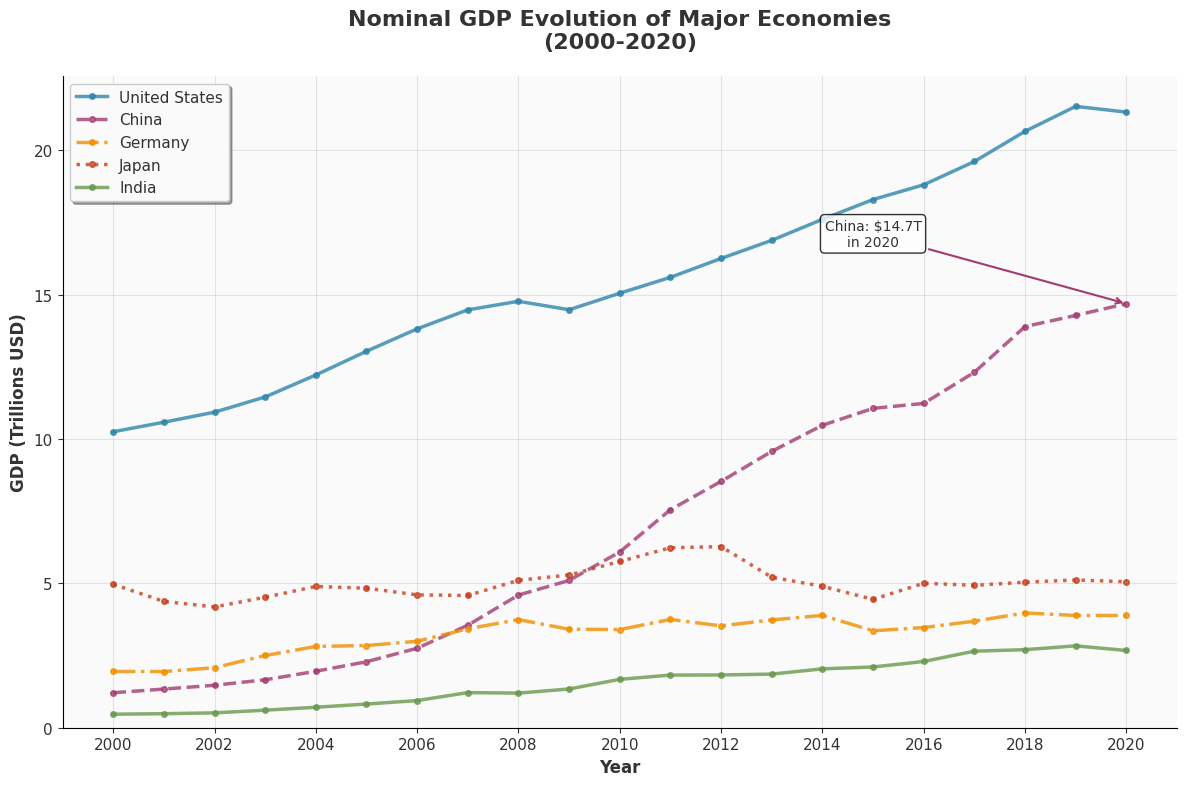


EXERCISE 2: Bar Chart


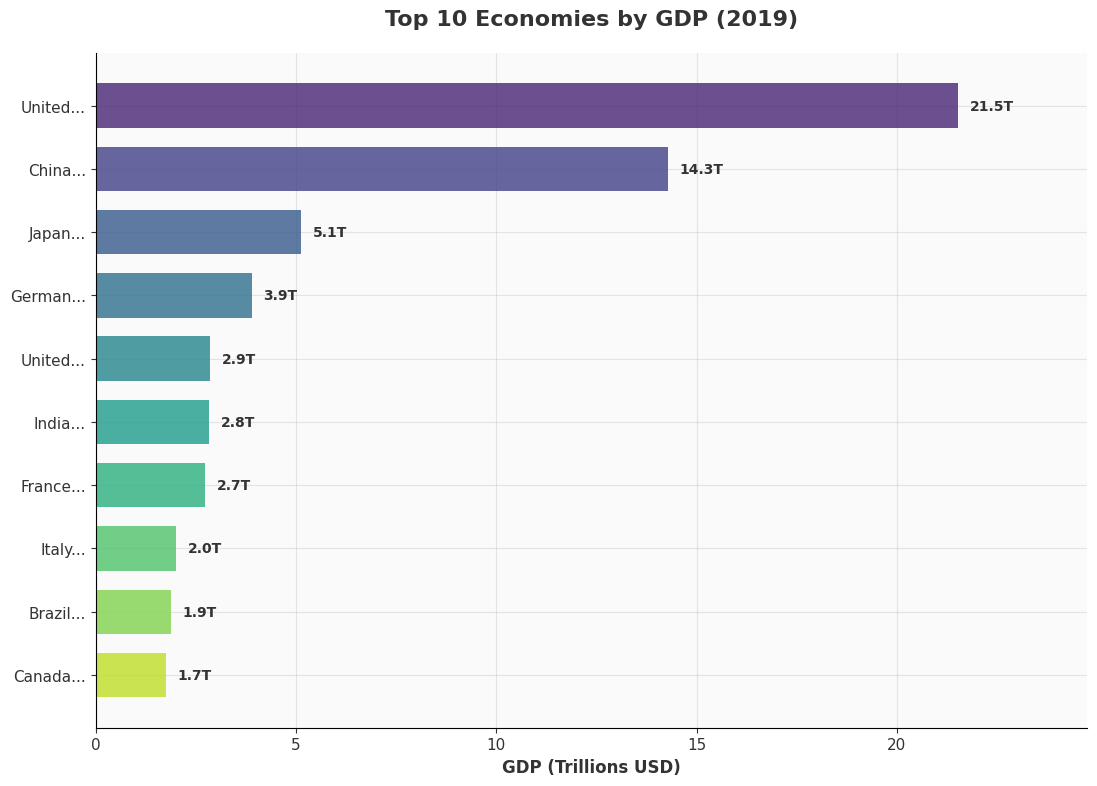


EXERCISE 3: Working with ordinal data


/var/folders/hv/d_h46zd97tqfnjf4xrvcjz1m0000gn/T/ipykernel_97053/2702455163.py:271: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_counts = df_years.groupby(["Year", "GDP_Category"]).size().unstack(fill_value=0)


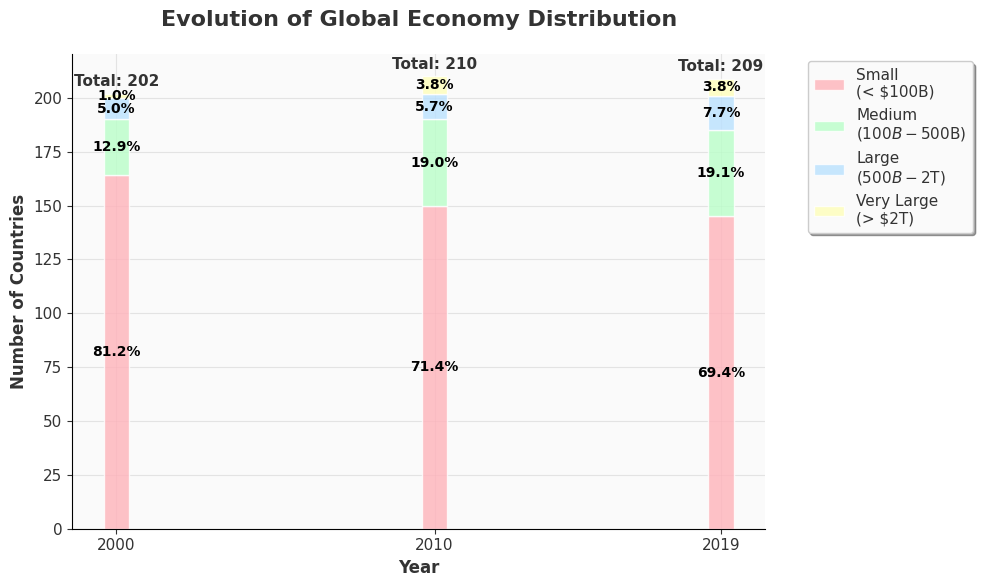


Summary of GDP Category Distribution:

2000:
  Small (< $100B): 164 countries (81.2%)
  Medium ($100B-$500B): 26 countries (12.9%)
  Large ($500B-$2T): 10 countries (5.0%)
  Very Large (> $2T): 2 countries (1.0%)

2010:
  Small (< $100B): 150 countries (71.4%)
  Medium ($100B-$500B): 40 countries (19.0%)
  Large ($500B-$2T): 12 countries (5.7%)
  Very Large (> $2T): 8 countries (3.8%)

2019:
  Small (< $100B): 145 countries (69.4%)
  Medium ($100B-$500B): 40 countries (19.1%)
  Large ($500B-$2T): 16 countries (7.7%)
  Very Large (> $2T): 8 countries (3.8%)

EXERCISE 4: Sublopts


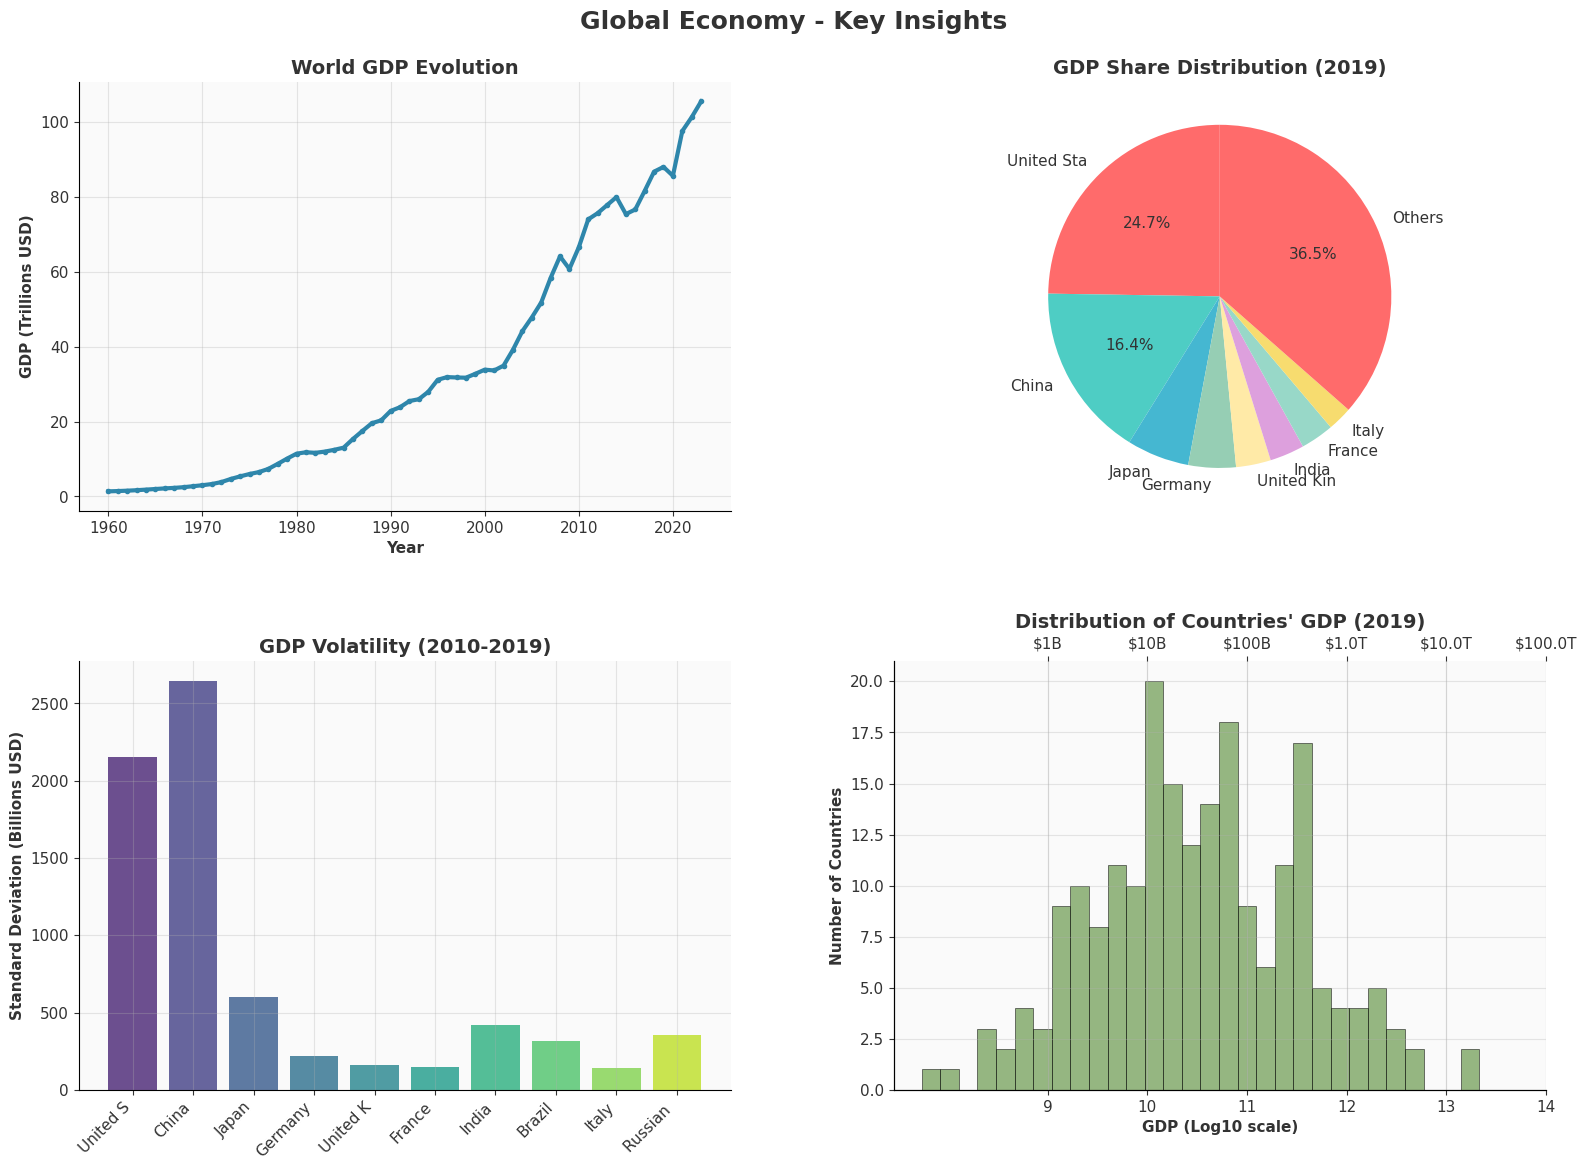


All exercises completed successfully!


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv("gdp.csv")

# Exclude non-country entities (regions, income groups)
non_country_entities = {
    "AFE",
    "AFW",
    "ARB",
    "CSS",
    "CEB",
    "CHI",
    "EAR",
    "EAS",
    "TEA",
    "EAP",
    "EMU",
    "ECS",
    "TEC",
    "ECA",
    "EUU",
    "FCS",
    "HPC",
    "HIC",
    "IBD",
    "IBT",
    "IDB",
    "IDX",
    "IDA",
    "LTE",
    "LCN",
    "LAC",
    "TLA",
    "LDC",
    "LMY",
    "LIC",
    "LMC",
    "MEA",
    "TMN",
    "MNA",
    "MIC",
    "NAC",
    "OED",
    "OSS",
    "PSS",
    "PST",
    "PRE",
    "SAS",
    "TSA",
    "SSF",
    "TSS",
    "SSA",
    "SST",
    "UMC",
    "WLD",
}
df_countries = df[~df["Country Code"].isin(non_country_entities)]
df_non_countries = df[df["Country Code"].isin(non_country_entities)]

print(
    f"Dataset loaded: {df_countries.shape[0]} rows, {df_countries['Country Name'].nunique()} countries"
)

# Set seaborn-like style
plt.style.use("default")
plt.rcParams.update(
    {
        "font.size": 11,
        "axes.linewidth": 0.8,
        "axes.spines.top": False,
        "axes.spines.right": False,
        "axes.grid": True,
        "grid.alpha": 0.3,
        "grid.linewidth": 0.8,
        "figure.facecolor": "white",
        "axes.facecolor": "#fafafa",
        "text.color": "#333333",
        "axes.labelcolor": "#333333",
        "xtick.color": "#333333",
        "ytick.color": "#333333",
    }
)

# Beautiful color palettes
colors_primary = ["#2E86AB", "#A23B72", "#F18F01", "#C73E1D", "#6A994E"]
colors_viridis = plt.cm.viridis(np.linspace(0.1, 0.9, 10))
colors_accent = [
    "#FF6B6B",
    "#4ECDC4",
    "#45B7D1",
    "#96CEB4",
    "#FFEAA7",
    "#DDA0DD",
    "#98D8C8",
    "#F7DC6F",
]

# =============================================================================
# EXERCISE 1: Time Series Comparison
# =============================================================================


def exercise_1_time_series():
    """
    Create a line plot comparing GDP evolution (2000-2020) for 5 economies.
    Countries chosen: USA (largest economy), China (fastest growth), Germany (Europe leader),
    Japan (tech powerhouse), India (emerging market)
    """
    # Filter data for 2000-2020 and selected countries
    selected_countries = ["United States", "China", "Germany", "Japan", "India"]
    selected_codes = ["USA", "CHN", "DEU", "JPN", "IND"]

    df_filtered = df_countries[
        (df_countries["Year"] >= 2000)
        & (df_countries["Year"] <= 2020)
        & (df_countries["Country Code"].isin(selected_codes))
    ].copy()

    # Convert GDP to trillions for better readability
    df_filtered["GDP_Trillions"] = df_filtered["Value"] / 1e12

    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 8))

    # Line styles for variation
    line_styles = ["-", "--", "-.", ":", "-"]

    for i, (country, code) in enumerate(zip(selected_countries, selected_codes)):
        country_data = df_filtered[df_filtered["Country Code"] == code]
        ax.plot(
            country_data["Year"],
            country_data["GDP_Trillions"],
            color=colors_primary[i],
            linewidth=2.5,
            linestyle=line_styles[i],
            label=country,
            marker="o",
            markersize=4,
            alpha=0.8,
        )

    # Styling
    ax.set_xlabel("Year", fontweight="bold", fontsize=12)
    ax.set_ylabel("GDP (Trillions USD)", fontweight="bold", fontsize=12)
    ax.set_title(
        "Nominal GDP Evolution of Major Economies\n(2000-2020)",
        fontsize=16,
        fontweight="bold",
        pad=20,
    )

    # Grid with transparency
    ax.grid(True, alpha=0.3, linewidth=0.8)

    # Legend
    ax.legend(frameon=True, fancybox=True, shadow=True, loc="upper left")

    # Add annotation for China's GDP value
    china_2020 = df_filtered[
        (df_filtered["Country Code"] == "CHN") & (df_filtered["Year"] == 2020)
    ]["GDP_Trillions"].iloc[0]
    ax.annotate(
        f"China: ${china_2020:.1f}T\nin 2020",
        xy=(2020, china_2020),
        xytext=(2015, china_2020 + 2),
        arrowprops=dict(arrowstyle="->", color="#A23B72", lw=1.5),
        fontsize=10,
        ha="center",
        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
    )

    # Set y-axis to start from 0 for better comparison
    ax.set_ylim(0, None)

    # Fix x-axis to show only whole years (no half values)
    ax.set_xticks(range(2000, 2021, 2))  # Every 2 years from 2000 to 2020

    plt.tight_layout()
    plt.show()


# =============================================================================
# EXERCISE 2: Bar Chart
# =============================================================================


def exercise_2_bar_chart():
    """
    Create a horizontal bar chart of the top 10 countries by 2019 GDP.
    """
    # Filter for 2019 data and get top 10
    df_2019 = df_countries[df_countries["Year"] == 2019].copy()
    df_2019 = df_2019.dropna(subset=["Value"])
    top_10 = df_2019.nlargest(10, "Value")

    # Convert to trillions and truncate long country names
    top_10["GDP_Trillions"] = top_10["Value"] / 1e12
    top_10["Country_Short"] = top_10["Country Name"].str[:6] + "..."

    # Create horizontal bar chart
    fig, ax = plt.subplots(figsize=(12, 8))

    # Create bars with viridis colormap
    bars = ax.barh(
        range(len(top_10)), top_10["GDP_Trillions"], color=colors_viridis, height=0.7, alpha=0.8
    )

    # Customize the plot
    ax.set_yticks(range(len(top_10)))
    ax.set_yticklabels(top_10["Country_Short"].tolist())
    ax.set_xlabel("GDP (Trillions USD)", fontweight="bold", fontsize=12)
    ax.set_title("Top 10 Economies by GDP (2019)", fontsize=16, fontweight="bold", pad=20)

    # Add value labels on bars
    for i, (bar, value) in enumerate(zip(bars, top_10["GDP_Trillions"])):
        ax.text(value + 0.3, i, f"{value:.1f}T", va="center", fontweight="bold", fontsize=10)

    # Grid
    ax.grid(True, alpha=0.3, axis="x")
    ax.set_axisbelow(True)

    # Invert y-axis to have highest GDP at top
    ax.invert_yaxis()

    # Adjust layout to prevent cropping of labels and annotations
    max_gdp = top_10["GDP_Trillions"].max()
    ax.set_xlim(0, max_gdp * 1.15)  # Add 15% padding on the right for annotations

    plt.tight_layout()
    plt.subplots_adjust(left=0.16)  # Add extra space on left for country names
    plt.show()


# =============================================================================
# EXERCISE 3: Working with ordinal data
# =============================================================================


def exercise_3_ordinal_data():
    """
    Create a stacked bar chart showing the distribution of countries
    across different GDP categories over time.
    """
    # Select years for comparison
    years = [2000, 2010, 2019]

    # Filter data for selected years
    df_years = df_countries[df_countries["Year"].isin(years)].copy()
    df_years = df_years.dropna(subset=["Value"])

    # Convert to billions for easier interpretation
    df_years["GDP_Billions"] = df_years["Value"] / 1e9

    # Define GDP categories using pd.cut()
    bins = [0, 100, 500, 2000, float("inf")]
    labels = [
        "Small\n(< $100B)",
        "Medium\n($100B-$500B)",
        "Large\n($500B-$2T)",
        "Very Large\n(> $2T)",
    ]

    df_years["GDP_Category"] = pd.cut(
        df_years["GDP_Billions"], bins=bins, labels=labels, right=False
    )

    # Count countries in each category by year
    category_counts = df_years.groupby(["Year", "GDP_Category"]).size().unstack(fill_value=0)

    # Calculate percentages for labels
    category_percentages = category_counts.div(category_counts.sum(axis=1), axis=0) * 100

    # Create stacked bar chart
    fig, ax = plt.subplots(figsize=(10, 6))

    # Colors for each category (using a categorical palette)
    category_colors = ["#FFB3BA", "#BAFFC9", "#BAE1FF", "#FFFFBA"]

    # Create stacked bars
    bottom = np.zeros(len(years))
    bars = []

    for i, category in enumerate(labels):
        if category in category_counts.columns:
            values = category_counts[category].values
            bar = ax.bar(
                years,
                values,
                bottom=bottom,
                color=category_colors[i],
                label=category,
                alpha=0.8,
                edgecolor="white",
                linewidth=1,
            )
            bars.append(bar)

            # Add percentage labels on each segment
            for j, (year, value, perc) in enumerate(
                zip(years, values, category_percentages[category].values)
            ):
                if value > 0:  # Only add label if segment exists
                    ax.text(
                        year,
                        bottom[j] + value / 2,
                        f"{perc:.1f}%",
                        ha="center",
                        va="center",
                        fontweight="bold",
                        fontsize=10,
                        color="black",
                    )

            bottom += values

    # Customize the plot
    ax.set_xlabel("Year", fontweight="bold", fontsize=12)
    ax.set_ylabel("Number of Countries", fontweight="bold", fontsize=12)
    ax.set_title("Evolution of Global Economy Distribution", fontsize=16, fontweight="bold", pad=20)

    # Set x-axis ticks
    ax.set_xticks(years)
    ax.set_xticklabels(years)

    # Add grid
    ax.grid(True, alpha=0.3, axis="y")
    ax.set_axisbelow(True)

    # Legend positioned outside the plot area
    ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left", frameon=True, fancybox=True, shadow=True)

    # Add total count labels on top of each bar
    for i, year in enumerate(years):
        total = category_counts.loc[year].sum()
        ax.text(
            year,
            total + 2,
            f"Total: {total}",
            ha="center",
            va="bottom",
            fontweight="bold",
            fontsize=11,
        )

    plt.tight_layout()
    plt.show()

    # Print summary statistics
    print("\nSummary of GDP Category Distribution:")
    print("=" * 50)
    for year in years:
        print(f"\n{year}:")
        year_data = category_counts.loc[year]
        year_percentages = category_percentages.loc[year]
        for category in labels:
            if category in year_data.index:
                count = year_data[category]
                percentage = year_percentages[category]
                print(f"  {category.replace(chr(10), ' ')}: {count} countries ({percentage:.1f}%)")


# =============================================================================
# EXERCISE 4: Subplots
# =============================================================================


def exercise_4_subplots():
    """
    Create a 2x2 subplot showing different aspects of global economy.
    """
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

    # 1. Top-left: World GDP over time
    world_data = df_non_countries[df_non_countries["Country Code"] == "WLD"].copy()
    world_data["GDP_Trillions"] = world_data["Value"] / 1e12

    ax1.plot(
        world_data["Year"],
        world_data["GDP_Trillions"],
        color="#2E86AB",
        linewidth=3,
        marker="o",
        markersize=3,
    )
    ax1.set_title("World GDP Evolution", fontweight="bold", fontsize=14)
    ax1.set_xlabel("Year", fontweight="bold")
    ax1.set_ylabel("GDP (Trillions USD)", fontweight="bold")
    ax1.grid(True, alpha=0.3)

    # 2. Top-right: Pie chart of 2019 GDP share for top 8 + Others
    df_2019 = df_countries[df_countries["Year"] == 2019].dropna(subset=["Value"])
    top_8 = df_2019.nlargest(8, "Value")
    others_value = df_2019["Value"].sum() - top_8["Value"].sum()

    # Prepare data for pie chart
    pie_values = list(top_8["Value"]) + [others_value]
    pie_labels = list(top_8["Country Name"].str[:10]) + ["Others"]

    # Create autopct function to show percentage only for values > 16%
    def autopct_format(pct):
        return f"{pct:.1f}%" if pct > 16 else ""

    wedges, texts, autotexts = ax2.pie(
        pie_values, labels=pie_labels, autopct=autopct_format, colors=colors_accent, startangle=90
    )
    ax2.set_title("GDP Share Distribution (2019)", fontweight="bold", fontsize=14)

    # 3. Bottom-left: GDP volatility (std dev 2010-2019) for top 10 economies
    df_period = df_countries[(df_countries["Year"] >= 2010) & (df_countries["Year"] <= 2019)].copy()

    # Calculate volatility (standard deviation) for each country
    volatility = df_period.groupby("Country Name")["Value"].agg(["mean", "std"]).reset_index()
    volatility = volatility.dropna()

    # Get top 10 by mean GDP and their volatility
    top_10_volatile = volatility.nlargest(10, "mean")
    top_10_volatile["std_billions"] = top_10_volatile["std"] / 1e9

    bars = ax3.bar(
        range(len(top_10_volatile)),
        top_10_volatile["std_billions"],
        color=colors_viridis[: len(top_10_volatile)],
        alpha=0.8,
    )
    ax3.set_xticks(range(len(top_10_volatile)))
    ax3.set_xticklabels(top_10_volatile["Country Name"].str[:8], rotation=45, ha="right")
    ax3.set_title("GDP Volatility (2010-2019)", fontweight="bold", fontsize=14)
    ax3.set_ylabel("Standard Deviation (Billions USD)", fontweight="bold")
    ax3.grid(True, alpha=0.3, axis="y")

    # 4. Bottom-right: Histogram of all countries' 2019 GDP (log scale)
    gdp_2019_values = df_2019["Value"].dropna()
    gdp_2019_log = np.log10(gdp_2019_values)

    ax4.hist(gdp_2019_log, bins=30, color="#6A994E", alpha=0.7, edgecolor="black", linewidth=0.5)
    ax4.set_title("Distribution of Countries' GDP (2019)", fontweight="bold", fontsize=14)
    ax4.set_xlabel("GDP (Log10 scale)", fontweight="bold")
    ax4.set_ylabel("Number of Countries", fontweight="bold")
    ax4.grid(True, alpha=0.3)

    # Set consistent ticks for both axes
    log_ticks = [9, 10, 11, 12, 13, 14]
    ax4.set_xticks(log_ticks)

    # Add log scale labels for better interpretation
    ax4_twin = ax4.twiny()
    ax4_twin.set_xlim(ax4.get_xlim())
    ax4_twin.set_xticks(log_ticks)
    ax4_twin.set_xticklabels(
        [f"${10**x / 1e12:.1f}T" if x >= 12 else f"${10**x / 1e9:.0f}B" for x in log_ticks]
    )

    # Main title
    fig.suptitle("Global Economy - Key Insights", fontsize=18, fontweight="bold", y=0.98)

    # Adjust spacing between subplots to prevent overlap
    plt.tight_layout(
        h_pad=0.5,
        w_pad=0.5,
    )
    plt.subplots_adjust(hspace=0.35, wspace=0.25, top=0.92, bottom=0.08)
    plt.show()


# =============================================================================
# EXECUTE ALL EXERCISES
# =============================================================================

if __name__ == "__main__":
    print("=" * 60)
    print("EXERCISE 1: Time Series Comparison")
    print("=" * 60)
    exercise_1_time_series()

    print("\n" + "=" * 60)
    print("EXERCISE 2: Bar Chart")
    print("=" * 60)
    exercise_2_bar_chart()

    print("\n" + "=" * 60)
    print("EXERCISE 3: Working with ordinal data")
    print("=" * 60)
    exercise_3_ordinal_data()

    print("\n" + "=" * 60)
    print("EXERCISE 4: Sublopts")
    print("=" * 60)
    exercise_4_subplots()

    print("\n" + "=" * 60)
    print("All exercises completed successfully!")
    print("=" * 60)
